In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

data = pd.read_csv('/cubic_zirconia.csv')
df=pd.DataFrame(data)
print(df)
df.head()

       Unnamed: 0  carat        cut color clarity  depth  table     x     y  \
0               1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29   
1               2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46   
2               3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12   
3               4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80   
4               5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43   
...           ...    ...        ...   ...     ...    ...    ...   ...   ...   
26962       26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52   
26963       26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42   
26964       26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15   
26965       26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20   
26966       26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88   

          z  price  
0      2.66    499  
1      2.

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:

imputer=SimpleImputer(strategy='mean')
df_imputed=df.copy()
cols=[1,5,6,7,8,9,10]
selected_cols = df_imputed.iloc[:,cols]
imputed_data = imputer.fit_transform(selected_cols)
df_imputed.iloc[:,cols] = imputed_data

'''Checking a row that had missing value before imputing'''
print(df_imputed.loc[26960])
df_imputed.tail()

Unnamed: 0        26961
carat               1.1
cut           Very Good
color                 D
clarity             SI2
depth         61.745147
table              63.0
x                  6.76
y                  6.69
z                  3.94
price              4361
Name: 26960, dtype: object


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


Handling outliers

In [ ]:
df_noduplicates = df_imputed.drop_duplicates(keep='first')

# Price
Q1p = df_noduplicates['price'].quantile(0.25)
Q3p = df_noduplicates['price'].quantile(0.75)
IQRp = Q3p - Q1p
lower_p = Q1p - 1.5 * IQRp
upper_p = Q3p + 1.5 * IQRp

# Carat
Q1c = df_noduplicates['carat'].quantile(0.25)
Q3c = df_noduplicates['carat'].quantile(0.75)
IQRc = Q3c - Q1c
lower_c = Q1c - 1.5 * IQRc
upper_c = Q3c + 1.5 * IQRc

# Depth
Q1d = df_noduplicates['depth'].quantile(0.25)
Q3d = df_noduplicates['depth'].quantile(0.75)
IQRd = Q3d - Q1d
lower_d = Q1d - 1.5 * IQRd
upper_d = Q3d + 1.5 * IQRd

# Table
Q1t = df_noduplicates['table'].quantile(0.25)
Q3t = df_noduplicates['table'].quantile(0.75)
IQRt = Q3t - Q1t
lower_t = Q1t - 1.5 * IQRt
upper_t = Q3t + 1.5 * IQRt

# x
Q1x = df_noduplicates['x'].quantile(0.25)
Q3x = df_noduplicates['x'].quantile(0.75)
IQRx = Q3x - Q1x
lower_x = Q1x - 1.5 * IQRx
upper_x = Q3x + 1.5 * IQRx

# y
Q1y = df_noduplicates['y'].quantile(0.25)
Q3y = df_noduplicates['y'].quantile(0.75)
IQRy = Q3y - Q1y
lower_y = Q1y - 1.5 * IQRy
upper_y = Q3y + 1.5 * IQRy

# z
Q1z = df_noduplicates['z'].quantile(0.25)
Q3z = df_noduplicates['z'].quantile(0.75)
IQRz = Q3z - Q1z
lower_z = Q1z - 1.5 * IQRz
upper_z = Q3z + 1.5 * IQRz

df_no_priceoutliers = df_noduplicates[(df_noduplicates['price']>=lower_p) & (df_noduplicates['price']<=upper_p)]
df_no_caratoutliers = df_no_priceoutliers[(df_no_priceoutliers['carat']>=lower_c) & (df_no_priceoutliers['carat']<=upper_c)]
df_no_depthoutliers = df_no_caratoutliers[(df_no_caratoutliers['depth']>=lower_d) & (df_no_caratoutliers['depth']<=upper_d)]
df_no_tableoutliers = df_no_depthoutliers[(df_no_depthoutliers['table']>=lower_t) & (df_no_depthoutliers['table']<=upper_t)]
df_no_xoutliers = df_no_tableoutliers[(df_no_tableoutliers['x']>=lower_x) & (df_no_tableoutliers['x']<=upper_x)]
df_no_youtliers = df_no_xoutliers[(df_no_xoutliers['y']>=lower_y) & (df_no_xoutliers['y']<=upper_y)]
df_no_outliers = df_no_youtliers[(df_no_youtliers['z']>=lower_z) & (df_no_youtliers['z']<=upper_z)]

Encoding

In [ ]:
label_encoder = LabelEncoder()
df_no_outliers.loc[:,'cut'] = label_encoder.fit_transform(df_no_outliers['cut'])
df_no_outliers.loc[:,'color'] = label_encoder.fit_transform(df_no_outliers['color'])
df_no_outliers.loc[:,'clarity'] = label_encoder.fit_transform(df_no_outliers['clarity'])
df_encoded = df_no_outliers.drop(columns=['cut','color','clarity'])
df_encoded.head()

,Unnamed: 0,carat,depth,table,x,y,z,price
0,1,0.30,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
std_scaler = StandardScaler()
df_standardised = std_scaler.fit_transform(df_encoded)
df_standardised = pd.DataFrame(df_standardised, columns=df_encoded.columns)
df_standardised.head()

,Unnamed: 0,carat,depth,table,x,y,z,price
0,-1.731941,-1.088261,0.286900,0.377656,-1.289992,-1.282595,-1.255007,-0.940636
1,-1.731812,-1.008583,-0.942230,0.377656,-1.138295,-1.109597,-1.189674,-0.766302
2,-1.731684,0.505299,0.381448,1.373974,0.500036,0.579679,0.574308,1.140587
3,-1.731555,-0.769549,-0.185842,-0.618663,-0.733769,-0.763600,-0.765012,-0.731076
4,-1.731427,-1.061701,-1.320424,0.875815,-1.209087,-1.140126,-1.271340,-0.839989


In [ ]:
from sklearn.model_selection import train_test_split
x=df_standardised.drop(columns=['price'])
y=df_standardised['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.1313683681141022
Mean Absolute Error (MAE): 0.22668895680092407
R² Score: 0.865284236288696


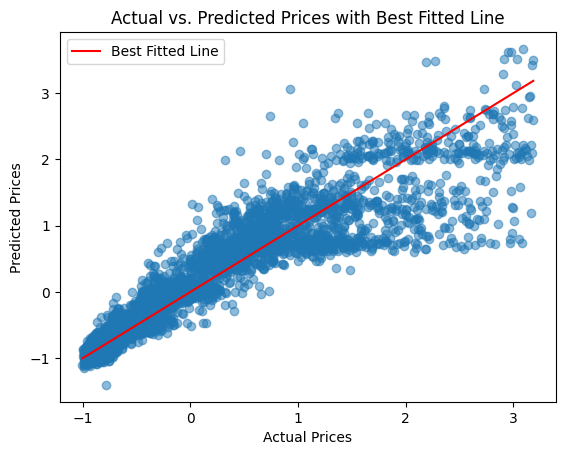

The plot shows that the model fits the data well


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (previous code for data preparation and model training) ...

plt.scatter(y_test, y_pred, alpha=0.5)  # Existing scatter plot code

# Add the following lines to plot the best-fitted line:
# 1. Generate data points for the line using NumPy
x_line = np.array([min(y_test), max(y_test)]) # Create a line across the range of y_test
y_line = x_line  # For the best-fitted line, predicted = actual, so y_line = x_line


# 2. Plot the line
plt.plot(x_line, y_line, color="red", label="Best Fitted Line")

# 3. (Optional) Add a legend
plt.legend()

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices with Best Fitted Line")

plt.show()
print('The plot shows that the model fits the data well')

Adding Polynomial features and analysing using the Linear regression models
- if polynomial regression has reduced mse/mae and improved r2 score,then polynomial regression explains or captures non linear relationships better than linear regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 2  #can experiment with various higher degrees to observe changes in mse, mae and r2
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_poly = poly.fit_transform(x)

xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(xp_train, yp_train)
yp_pred = poly_model.predict(xp_test)

mse_poly = mean_squared_error(yp_test, yp_pred)
mae_poly = mean_absolute_error(yp_test, yp_pred)
r2_poly = r2_score(yp_test, yp_pred)

print("Mean Squared Error (MSE) with Polynomial Features:", mse_poly)
print("Mean Absolute Error (MAE) with Polynomial Features:", mae_poly)
print("R² Score with Polynomial Features:", r2_poly)
''''''

Mean Squared Error (MSE) with Polynomial Features: 0.12449247441580427
Mean Absolute Error (MAE) with Polynomial Features: 0.21425245202061508
R² Score with Polynomial Features: 0.8723353345405933


''

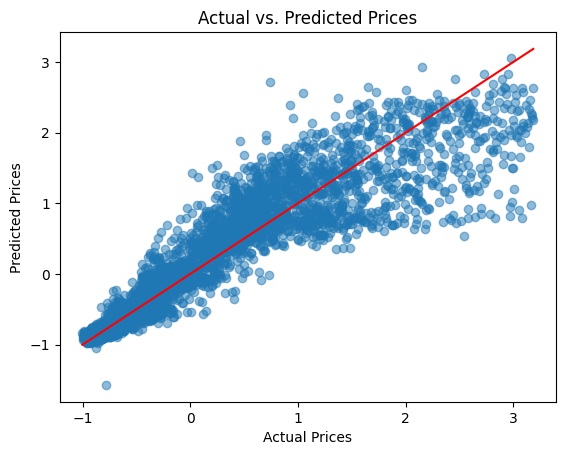

In [ ]:
plt.scatter(yp_test, yp_pred, alpha=0.5)
randvar1 = [min(y_test), max(y_test)]
plt.plot(randvar1, randvar1, color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.1, 1, 10, 100]  # Range of alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, x_train, y_train, scoring='neg_mean_squared_error', cv=5)  # 5-fold CV
    avg_score = -scores.mean()  # Negated because sklearn returns negative MSE
    print(f"Alpha: {alpha}, Avg MSE: {avg_score}")

Alpha: 0.1, Avg MSE: 0.14374133479498702
Alpha: 1, Avg MSE: 0.14372951273724094
Alpha: 10, Avg MSE: 0.14379761165147426
Alpha: 100, Avg MSE: 0.1464787037226128


In [ ]:
best_alpha = 1
ridge = Ridge(alpha=best_alpha)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE (after ridge): {mse}")
print(f"Test MAE (after ridge): {mae}")
print(f"Test R² (after ridge) :  {r2}")

Test MSE (after ridge): 0.13137556766539188
Test MAE (after ridge): 0.22669470877455747
Test R² (after ridge) :  0.8652768532857381


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
alphas = [0.01, 0.1, 1, 10]  # Range of alpha values
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # Ensure convergence for larger alphas
    scores = cross_val_score(lasso, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_score = -scores.mean()  # Convert negative MSE to positive
    print(f"Alpha: {alpha}, Avg MSE: {avg_score}")

Alpha: 0.01, Avg MSE: 0.14945526599411135
Alpha: 0.1, Avg MSE: 0.16164810520097614
Alpha: 1, Avg MSE: 1.0062219250227833
Alpha: 10, Avg MSE: 1.0062219250227833


In [ ]:
best_alpha = 0.01 # Replace with the optimal alpha from the cross-validation
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(x_train, y_train)

# Get feature coefficients
lasso_coefficients = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lasso.coef_
})

# Display features retained by Lasso
Dropped_features = lasso_coefficients[lasso_coefficients["Coefficient"] == 0]
print("removed/dropped Features by Lasso:")
print(Dropped_features)

removed/dropped Features by Lasso:
      Feature  Coefficient
0  Unnamed: 0         -0.0
4           x         -0.0
5           y          0.0
6           z         -0.0


In [ ]:

# Predict using Lasso Regression
y_pred_lasso = lasso.predict(x_test)

# Calculate metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression Test MSE: {mse_lasso}")
print(f"Lasso Regression Test MAE: {mae_lasso}")
print(f"Lasso Regression Test R²: {r2_lasso}")

Lasso Regression Test MSE: 0.13741040837908097
Lasso Regression Test MAE: 0.24428622982470052
Lasso Regression Test R²: 0.8590882388780858


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

y_pred_gbr = gbr.predict(x_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting RMSE: {rmse_gbr}")
print(f"Gradient Boosting MAE: {mae_gbr}")
print(f"Gradient Boosting R²: {r2_gbr}")

Gradient Boosting MSE: 0.11772205344082377
Gradient Boosting RMSE: 0.34310647536999905
Gradient Boosting MAE: 0.20729523265194436
Gradient Boosting R²: 0.8792782725201481


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
